# 第6章 学習に関するテクニック

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SGD():
    # lr = learning rate
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            
class Momentum():
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            
class AdaGrad():
    def __init__(self, lr=0.01):
        self.lr = lr
        self. h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [24]:
import copy

def func_xy(params):
    xs = params["x"]
    x = xs[0]
    y = xs[1]
    out = x*x/20.0 + y*y
    dx = x/10.0
    dy = 2.0*y
    grads = {}
    grads["x"] = np.array([dx, dy])
    return grads

def plot_contour():
    x = np.arange(-8, 8, 0.1)
    y = np.arange(-3, 3, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = X*X/20.0 + Y*Y
    plt.contour(X, Y, Z, colors="k")    

def simulate(f, optimizer, params0, num_iter):
    res = []
    params = params0
    for i in range(num_iter):
        res.append(copy.deepcopy(params))
        grads = f(params)    
        optimizer.update(params, grads)
    return res

Text(0.5, 1.0, 'SGD')

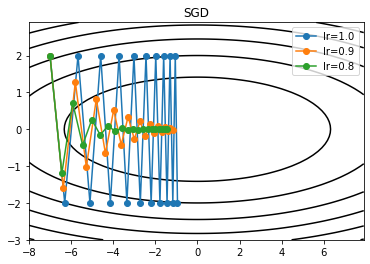

In [29]:
plot_contour()
for lr in [1.0, 0.9, 0.8]:
    res = simulate(func_xy, SGD(lr = lr), {"x": np.array([-7.0, 2.0])}, 20)
    xy = np.transpose(np.array([r['x'] for r in res]))
    plt.plot(xy[0], xy[1], "o-", label="lr={}".format(lr))
plt.legend()
plt.title("SGD")

Text(0.5, 1.0, 'Momentum')

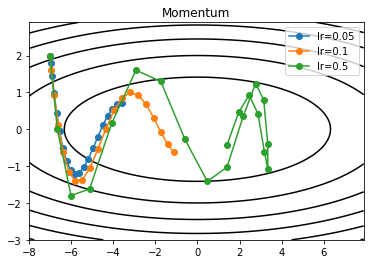

In [28]:
plot_contour()
for lr in [0.05, 0.1, 0.5]:
    res = simulate(func_xy, Momentum(lr = lr), {"x": np.array([-7.0, 2.0])}, 20)
    xy = np.transpose(np.array([r['x'] for r in res]))
    plt.plot(xy[0], xy[1], "o-", label="lr={}".format(lr))
plt.legend()
plt.title("Momentum")

Text(0.5, 1.0, 'ADA')

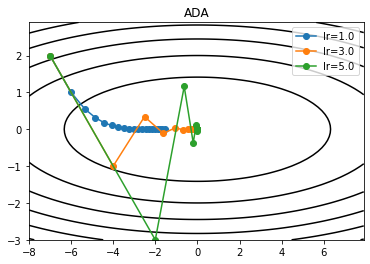

In [27]:
plot_contour()
for lr in [1.0, 3.0, 5.0]:
    res = simulate(func_xy, AdaGrad(lr = lr), {"x": np.array([-7.0, 2.0])}, 20)
    xy = np.transpose(np.array([r['x'] for r in res]))
    plt.plot(xy[0], xy[1], "o-", label="lr={}".format(lr))
plt.legend()
plt.title("ADA")

# 6.2 重みの初期値

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calc_activations(sig_w, node_num):
    x = np.random.randn(1000, node_num)
    hidden_layer_size = 1
    activations = {}

    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]
        
        w = np.random.randn(node_num, node_num) * sig_w
        z = np.dot(x, w)
        a = sigmoid(z)        
        activations[i] = a    
    return activations

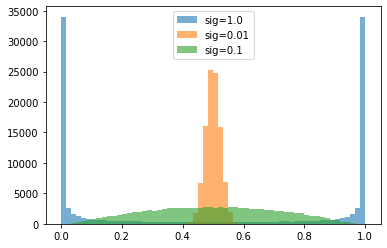

In [39]:
node_num = 100
for sig_w in [1.0, 0.01, 1/np.sqrt(node_num)]:
    a = calc_activations(sig_w, node_num)[0]
    plt.hist(a.flatten(), 60, range=(0, 1), alpha=0.6, label="sig={}".format(sig_w))
plt.legend()

# 6.3 Batch normalization

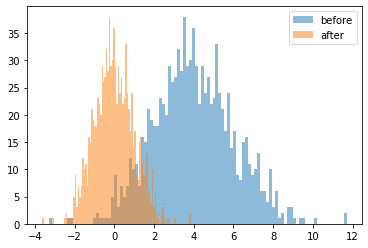

In [52]:
xs = np.random.normal(4.0, 2.0, 1000)
mu =  np.sum(xs) / len(xs)
sig = np.sqrt(np.sum((xs-mu)**2) / len(xs))
ys = (xs-mu) / sig
plt.hist(xs, 100, alpha=0.5, label="before")
plt.hist(ys, 100, alpha=0.5, label="after")
plt.legend()
plt.show()